# Thanks for joining us!

This is a sample python notebook where we expect you'll be pending a lot of your time. Notebooks are great because not only can you [write notes in markdown](https://guides.github.com/features/mastering-markdown/), and [math in $\LaTeX$](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes), but you can write code too! Check this out:

In [1]:
print("Hello World")

Hello World


Our lab studies material deformation at a mesoscale. Think of a spring (TODO)

In discrete dislocation dynamics, we typically think of these of these lattice mismatches (or dislocations) [as similar to a graph](https://www.youtube.com/watch?v=ZHqQDA3be-k). This is a pretty fun area of math, I'm sad all the examples I found online were pretty boring. Notably, we DO care where the vertices (we call them nodes) are, and DO care about additional physical information assosiated with the edges (or segments as we refer to them). However, treating DDD as a graph problem makes it easier for use when programming.

## Learning goals of 1st week:

 - Learn basic material science intuition for what our lab does
 - Learn some basic python to get up to speed
 - Learn some discrete math, graph theory, and algorithms
 - Learn some basic linear algebra

## First deliverable

We have a python library backed by a more powerful C++ framework. Our current method for visualizing our dislocations systems, is to export our simulations and open them in paraview. Jupyter notebooks let us make plots right here! For example:

In [93]:
x = np.arange(-10, 11)
for i, val in enumerate(x):
    x[i] = val * val
x

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

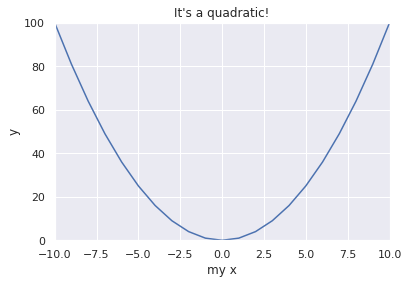

In [96]:
# Package for plotting in python
import matplotlib.pyplot as plt

# Seaborn makes matplotlib charts prettier.
import seaborn as sns
sns.set()

# Numpy is a great package for doing math.
import numpy as np

# You probably remember quadratic equations
# y = x^2
# We're just going to calculate and plot that
x = np.arange(-10, 11) # -10, -9, .. 10
y = x**2               # 100, 81, .. 100

# We can now set up our plotting guidlines
plt.title("It's a quadratic!")
plt.xlim((-10, 10))
plt.ylim((0, 100))
plt.xlabel("my x")
plt.ylabel("y")

# And finally we plot
plt.plot(x, y)
plt.show()

We would like a way to plot our dislocation networks right in jupyter. Currently this functionality does not exist. Documentation of our library can be found [here](https://dmadisetti.github.io/pd3/api-py-pd3--python--core--Study/). An example of using our library is as follows:

In [4]:
# pd3 is our library!
# it stands for: parallel discrete partial dislocation + precipitate dynamics 
# but really, it's just fun to say
import pd3
from pd3.proto.study_pb2 import IMMOBILE

# A "normal" vector is a vector that is length 1 from the origin (0,0).
# This makes any vector "normal"
def normalize(a, b, c):
    """Creates a unit vector from a, b, c"""
    vector = np.array([a, b, c])
    return vector / np.linalg.norm(vector)

# This is the 'plane normal'. A plane cuts through 3D space, and the normal, is perpendicular to all vectors on the plane. That is normal \dot vector = 0
normal = normalize(1, 1, 1)

# These are directions on the plane. We can chose any 2 vectors to be our 'basis', but these are nice
# and relevant to crystallography in FCC materials.
# Note y_dir dot x_dir = 0, but also
# x_dir dot normal = y_dir dot normal = 0!
y_direction = normalize(-1, 1, 0)
x_direction = normalize(1, 1, -2)

# Burger's direction is a means of measuring the type and magnitude of the lattice mismatches.
# This will come up much more. It is physically derived from something called a burger's circut
# which I can touch on more later.
burgers = pd3.Burgers((-1, 1, 0))

# We're going to make a parabola shape just like the previous example.
# But since we're in 3D, we need to handle the equation a little differently.
def in_plane_quadratic(x):
    y = x**2
    return x * x_direction + y * y_direction

# All pd3 usage starts off with creating a study.
example = pd3.Study()

# Start off our parabola
# Here we make a node, or vertex.
# We'll later "connect" vertices together to make an edge or segment.
# We note that the node is "IMMOBILE", which means it can't move during
# our simulations.
start = example.create_node(
    in_plane_quadratic(-10), # This is the position in space
    IMMOBILE # This is the type of node, which means it's fixed in space.
)
old_node = start

# Create a node for each step, and connect each next
# step to the previous step.
for x in range(-9, 10):
    new_node = example.create_node(
        in_plane_quadratic(x), # The position in space changes with x
    )
    # We make the segment by connecting 2 nodes.
    example.connect(old_node, new_node, burgers)
    # We set the old_node to new node for the next loop.
    old_node = new_node

# Add the end to our parabola!
end = example.create_node(
    in_plane_quadratic(10), # The other side of the quadratic
    IMMOBILE # This end is also fixed.
)
example.connect(old_node, end, burgers)

# Convert our system into a graph for plotting
graph = example.export_protobuf()

In [5]:
# Here's an example of how to break up our graph to get the edges and vertices.
timestep = 0
vertices = graph.state[timestep].nodes
edges = graph.state[timestep].links

# We can now choose an edge, find the id of one of the nodes, and then get a node.
index = 0
sample_node_id = edges[index].leading
sample_node = vertices[sample_node_id]
sample_node_id, sample_node

(37542416, x: -48.52082031964994
 y: 41.98884767222813
 z: 6.531972647421809
 type: MOBILE)

In [23]:
x_axis=(1, 0, 0)

x_axis = np.array(x_axis)
x_axis

array([1, 0, 0])

## Note


You'll notice that the points are in 3d, while plots can only really be done in 2d. So we need to prescribe the x, y axis in 3D space to come up with a 3D plot. One you feel comfortable with the content your first task will be to fill out the following function.

An error occured.
ValueError: Please install nodejs >=10.0.0 before continuing. nodejs may be installed using conda or directly from the nodejs website.
See the log file for details:  /tmp/jupyterlab-debug-h2d_4a7y.log


In [102]:
import ipyvolume as ipv
import numpy as np
s = 1/2**0.5
# 4 vertices for the tetrahedron
x = np.array([1.,  -1, 0,  0])
y = np.array([0,   0, 1., -1])
z = np.array([-s, -s, s,  s])
# and 4 surfaces (triangles), where the number refer to the vertex index
triangles = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1,3,2)]
ipv.figure()
# we draw the tetrahedron
mesh = ipv.plot_trisurf(x, y, z, triangles=triangles, color='orange')
# and also mark the vertices
ipv.scatter(x, y, z, marker='sphere', color='blue')
ipv.xyzlim(-2, 2)
ipv.show()

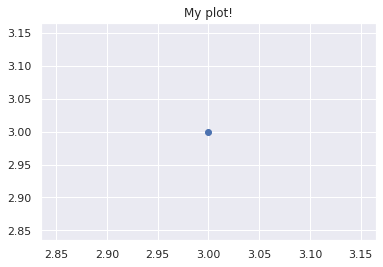

In [100]:
# Maybe you want: import ipyvolume as ipv
# https://ipyvolume.readthedocs.io/en/latest/examples/mesh.html
# ipvol

import matplotlib.pyplot as plt

plt.title("My plot!")
#plt.plot([1, 0], [1, 1], "o-")
#plt.xlim(-1, 1.5)
#plt.ylim(-1, 1.5)

# Example 3D -> 2D
somepoint = np.array([1, 2, 3])

# NOTE axes should be normalized first
x_axis = np.array((1,1,0))
y_axis = np.array((1,-1,0))

x_component = x_axis.dot(somepoint)
y_component = x_axis.dot(somepoint)

plt.plot([x_component], [y_component], "o")


In [32]:
import pd3
from pd3.proto.study_pb2 import IMMOBILE

def plot_study(study, x_axis=(1, 0, 0), y_axis=(0, 1, 0), timestep = 0):
    """! \brief Plots the dislocation system at the given timestep.

    Plots a given dislocation system with orthogonal axes.
    \param study Self instance.
    \param x_axis The x axis to project the system on.
    \param y_axis The y axis to projec the system on.
    \param timestep The timestep to plot.
    """
    # Ensure x_axis, y_axis are normalized
    x_axis = np.array(x_axis)
    x_axis = x_axis / np.linalg.norm(x_axis)
    y_axis = np.array(y_axis)
    y_axis = y_axis / np.linalg.norm(y_axis)
    
    # https://numpy.org/doc/stable/
    if x_axis.dot(y_axis) != 0:
        raise pd3.Pd3Exception("Provided axes are not normal.")

    # Convert our system into a graph for plotting
    # Note that the grpah is in protobuf format:
    # https://developers.google.com/protocol-buffers/docs/pythontutorial#the-protocol-buffer-api
    # In addition, fields can found in the provided documentation:
    # https://dmadisetti.github.io/pd3/api-proto-study/
    graph = study.export_protobuf()

    # Here's an example of how to break up our graph to get the edges and vertices.
    vertices = graph.state[timestep].nodes
    edges = graph.state[timestep].links

    # TODO: Plot the study with matplotlib
    # Store information from loop, and then plot it!
    # We can now choose an edge, find the id of one of the nodes, and then get a node.
    for edge in edges:
        # TODO: something with edge and the node IDs
        leading_id = edge.leading
        trailing_id = edge.trailing
        leading = vertices[leading_id]
        # leading.x, leading.y, leading.z
        
x = normalize(1,0,0)
y = normalize(0,1,0)
    
study = pd3.Study()
start = study.create_node((-2,3,-1), IMMOBILE)

# TODO: This should make a pretty similar graph to the standard quadratic graph above.
plot_study(example, (1,1,0), (1,-1,0))

In [67]:
# Here is what all the nodes and segments look like in the graph.
# state = graph.state[0]
# state.nodes

arr = [1, 2, 3, 4, 5]

hashmap = {
    "Hello!": "World",
    "crazy": {
        "Woah": "this is wild"
    },
    0: "Wow!",
    1: 123,
}


graph.state[0].nodes[45990720]

x: -27.90533386549889
y: 23.00635437993253
z: 4.898979485566357
type: MOBILE